# Derivadas numéricas

A definição de derivada é:

$$\frac{df}{dx} = \lim_{h \to 0} {f(x+h)-f(x) \over h}$$ 


O método mais simples para o cáculo de derivadas numéricas é o de diferenças finitas:

$$f'(x) \approx {f(x+h)-f(x) \over h}$$ 
foward diference

$$f'(x) \approx {f(x)-f(x-h) \over h}$$ 
backward diference


![derivadas](deriv-num.png)

Ao contrário das integrais, as derivadas numericas são afetadas pelo erro de arredondamento assim como erro de resolução devido a escolha do tamanho $h$ do inetrvalo.

No caso das derivadas como estamos lidando com uma subtração de numeros e estes tendem a ser muito proximos pois $h$ deve ser o menor possível, o erro de arredondamento fica importante.

O livro texto mostra como obter o $h$ ideal para que não se cometam grandes erros de arredondamento.
De modo geral, usando expansão de Taylor para expressar a função $f(x)$ pode-se mostrar que:

$$ h = \sqrt{4C \left|\frac{f(x)}{f''(x)} \right |} $$

$$ \epsilon = h|f''(x)| = ( 4C|f(x)f''(x)|)^{1/2} $$

onde C é a precisão da máquina. Ou seja, o tamanho ideal seria da ordem de $\sqrt{C}$, assim como o erro obtido. No caso do Python este valor é da ordem de 1.0e-8.

Uma maneira de se obter um resultado melhor é usando a diferença central:

$$f'(x) \approx {f(x+h/2)-f(x-h/2) \over h}$$ 

ou central or symmetric diference

usando as expansões obtemos para o $h$ ideal e o erro:


$$ h = \left( 24C \left|\frac{f(x)}{f'''(x)} \right | \right)^{1/3} $$

$$ \epsilon = \frac{1}{8}h^2|f'''(x)| = ( \frac{9}{8}C^2[f(x)]^2|f'''(x)|)^{1/3} $$

neste caso usando a precisão típica do Python temos um $h$ ideal de 1.0e-5 que leva a um erro da ordem de 1.0e-10.

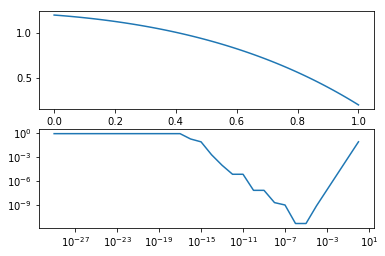

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return -(0.1*x**4)-(0.15*x**3)-(0.5*x**2)-(0.25*x)+1.2
    #return np.sin(x)

def df(x):
    return (-0.4*x**3)-(0.45*x**2)-(1.0*x)-0.25
    #return np.cos(x)

x = np.linspace(0,1,100)   
x0 = 0.5
n = 30

h = np.zeros(n,float)
err = np.zeros(n,float)

for i in range(n):
    h[i] = float(10**(-i))
    dfnum = (f(x0+h[i]/2.)-f(x0-h[i]/2.))/(h[i])
    dftrue = df(x0)
    err[i] = np.abs(dfnum-dftrue)
    
fig, ax = plt.subplots(2)
ax[0].plot(x,f(x))
ax[1].loglog(h,err)

    

In [17]:
plt.scatter(x,f(x))

TypeError: 'Figure' object is not callable

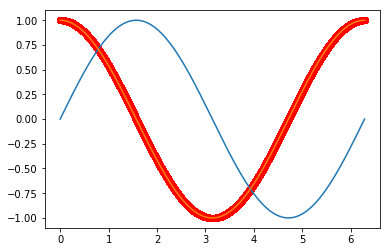

In [12]:
def f(x):
    #return -(0.1*x**4)-(0.15*x**3)-(0.5*x**2)-(0.25*x)+1.2
    return np.sin(x)

def df(x):
    #return (-0.4*x**3)-(0.45*x**2)-(1.0*x)-0.25
    return np.cos(x)

h = 1.0e-6

a = 0; b=2*np.pi

x = np.arange(a,b+h,h)
dfnum = np.zeros(x.size)

for i in range(x.size):
    if ((i > 0) & (i < x.size-2)):
        dfnum[i] = (f(x[i]+h)-f(x[i]-h))/(2*h)
    elif (i == 0):
        dfnum[i] = (f(x[i]+h)-f(x[i]))/h
    else:
        dfnum[i] = (f(x[i])-f(x[i]-h))/h
        
plt.plot(x,dfnum,'or')
plt.plot(x,f(x))
plt.plot(x,df(x))
plt.show()

In [9]:
interv.size

11

In [10]:
interv[10]

1.0